In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt

# Importing NumPy (Numerical Python) which is a library consisting of multidimensional array objects and a collection of routines for processing those arrays. It also gives an alias to the library.
import numpy as np

% matplotlib inline
np.random.seed(2017) 

# There are two main types of models available in Keras: the Sequential model and the Model class used with the functional API.
# Sequential model is a linear stack of layers. Importing Sequential model from Keras.
from keras.models import Sequential

# Importing different layers from Keras.
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization

# Importing the utils library of Keras.
from keras.utils import np_utils

# Importing the callbacks of Keras.
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [0]:
# CIFAR10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Importing CIFAR10 dataset from Keras.
from keras.datasets import cifar10

# Loading the CIFAR10 60000 Training and 10000 Test data into respective numpy arrays
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

# Setting the count, number of channels, rows and columns of training images
num_train, img_channels, img_rows, img_cols =  train_features.shape

# Setting the count of test images
num_test, _, _, _ =  test_features.shape

# Setting number of classes (10)
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


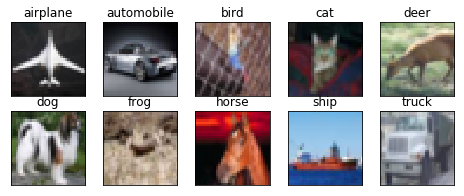

In [0]:
# Setting up the class names
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Plotting an image from each of the 10 classes
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
# Custom function to test accuracy
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
# Pixel normalization for training images
train_features = train_features.astype('float32')/255

# Pixel normalization for test images
test_features = test_features.astype('float32')/255

# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 14s 37ms/step - loss: 1.8557 - acc: 0.2909 - val_loss: 1.4735 - val_acc: 0.4525
Epoch 2/50
390/390 [==============================] - 9s 23ms/step - loss: 1.3558 - acc: 0.5100 - val_loss: 1.1324 - val_acc: 0.5925
Epoch 3/50
390/390 [==============================] - 9s 22ms/step - loss: 1.1333 - acc: 0.5973 - val_loss: 1.0095 - val_acc: 0.6409
Epoch 4/50
390/390 [==============================] - 9s 22ms/step - loss: 0.9850 - acc: 0.6534 - val_loss: 0.8653 - val_acc: 0.6950
Epoch 5/50
390/390 [==============================] - 9s 22ms/step - loss: 0.8872 - acc: 0.6918 - val_loss: 0.8266 - val_acc: 0.7186
Epoch 6/50
390/390 [==============================] - 9s 23ms/step - loss: 0.8106 - acc: 0.7212 - val_loss: 0.7360 - val_acc: 0.7470
Epoch 7/50
390/390 [==============================] - 9s 23ms/step - loss: 0.7573 - acc: 0.7380 - val_loss: 0.7131 - val_acc: 0.7559
Epoch 8/50
390/390 [==============================] - 9s 23ms/step -

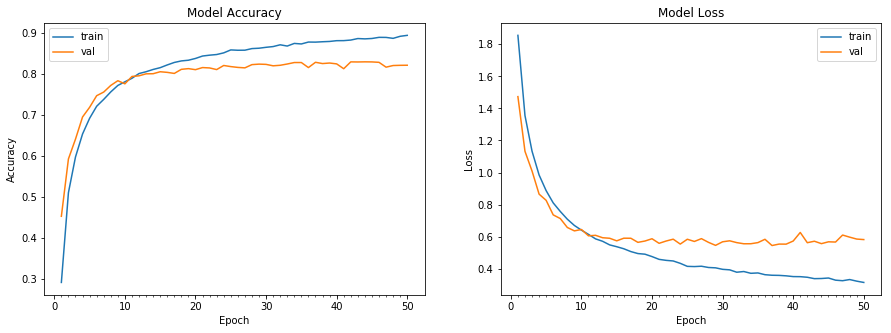

Accuracy on test data is: 82.14


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
# Training for another 50 epochs
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)

Epoch 1/50
  7/390 [..............................] - ETA: 8s - loss: 0.3062 - acc: 0.8884

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  This is separate from the ipykernel package so we can avoid doing imports until


390/390 [==============================] - 9s 23ms/step - loss: 0.3161 - acc: 0.8933 - val_loss: 0.5915 - val_acc: 0.8271
Epoch 2/50
390/390 [==============================] - 9s 23ms/step - loss: 0.3143 - acc: 0.8951 - val_loss: 0.5861 - val_acc: 0.8301
Epoch 3/50
390/390 [==============================] - 9s 23ms/step - loss: 0.3177 - acc: 0.8940 - val_loss: 0.5737 - val_acc: 0.8316
Epoch 4/50
390/390 [==============================] - 9s 23ms/step - loss: 0.3074 - acc: 0.8991 - val_loss: 0.6178 - val_acc: 0.8137
Epoch 5/50
390/390 [==============================] - 9s 23ms/step - loss: 0.3077 - acc: 0.8974 - val_loss: 0.6043 - val_acc: 0.8205
Epoch 6/50
390/390 [==============================] - 9s 23ms/step - loss: 0.3166 - acc: 0.8965 - val_loss: 0.5573 - val_acc: 0.8323
Epoch 7/50
390/390 [==============================] - 9s 23ms/step - loss: 0.2982 - acc: 0.9016 - val_loss: 0.5854 - val_acc: 0.8327
Epoch 8/50
390/390 [==============================] - 9s 23ms/step - loss: 0.304

# BASE TRAINING ACCURACY

Epoch 47/50
390/390 [==============================] - 9s 23ms/step - loss: 0.2533 - **acc: 0.9197** - val_loss: 0.5868 - val_acc: 0.8381

# CHANGED MODEL


*   Reduced the number of kernels being used.
*   Reduced the Receptive Field at the last layer from 64 to 32.
*   Changed the dropout rate to 0.125 from 0.25.
*   Removed Dense layer.
*   Removed Dropout at the last layer.
*   Removed "relu" activation at the last layer.
*   Added Batch Normalization before Convolution and Activation layers.
*   Followed the increase in number of kernels and then decrease by using 1x1 and MaxPooling and then again increase type of architecture (cake pattern).









In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #32,32; 3
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.125))
model.add(BatchNormalization())
model.add(Convolution2D(48, 3, 3, border_mode='same',)) #32,32; 5
model.add(Activation('relu'))

model.add(Convolution2D(32, 1, 1)) #32,32; 5
model.add(MaxPooling2D(pool_size=(2, 2))) #16,16; 10

model.add(Dropout(0.125))
model.add(BatchNormalization())
model.add(Convolution2D(48, 3, 3, border_mode='same')) #16,16; 12
model.add(Activation('relu'))

model.add(Dropout(0.125))
model.add(BatchNormalization())
model.add(Convolution2D(96, 3, 3, border_mode='same',)) #16,16; 14
model.add(Activation('relu'))

model.add(Convolution2D(32, 1, 1)) #16,16; 14
model.add(MaxPooling2D(pool_size=(2, 2))) #8,8; 28

model.add(Dropout(0.125))
model.add(BatchNormalization())
model.add(Convolution2D(48, 3, 3, border_mode='same')) #8,8; 30
model.add(Activation('relu'))

model.add(Dropout(0.125))
model.add(BatchNormalization())
model.add(Convolution2D(96, 3, 3, border_mode='same')) #8,8; 32
model.add(Activation('relu'))

model.add(Convolution2D(10, 1, 1)) #8,8; 32
model.add(Convolution2D(10, 8, 8)) #1,1; 32

model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3,

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 48)        13872     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 48)        0         
__________

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# Mounting the Google Drive to save the weights
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Specifying the path to store the weights
filepath="/content/gdrive/My Drive/Assignment6A:{epoch:03d}-acc:{acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True, save_weights_only=True, mode='max')

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`
  del sys.path[0]


Epoch 1/100
390/390 [==============================] - 14s 37ms/step - loss: 1.4335 - acc: 0.4801 - val_loss: 1.6118 - val_acc: 0.4626

Epoch 00001: acc improved from -inf to 0.48013, saving model to /content/gdrive/My Drive/Assignment6A:001-acc:0.480.hdf5
Epoch 2/100
390/390 [==============================] - 11s 27ms/step - loss: 1.0319 - acc: 0.6314 - val_loss: 1.0298 - val_acc: 0.6438

Epoch 00002: acc improved from 0.48013 to 0.63136, saving model to /content/gdrive/My Drive/Assignment6A:002-acc:0.631.hdf5
Epoch 3/100
390/390 [==============================] - 11s 27ms/step - loss: 0.8616 - acc: 0.6946 - val_loss: 0.9576 - val_acc: 0.6668

Epoch 00003: acc improved from 0.63136 to 0.69462, saving model to /content/gdrive/My Drive/Assignment6A:003-acc:0.695.hdf5
Epoch 4/100
390/390 [==============================] - 11s 27ms/step - loss: 0.7552 - acc: 0.7339 - val_loss: 0.7825 - val_acc: 0.7255

Epoch 00004: acc improved from 0.69462 to 0.73390, saving model to /content/gdrive/My D

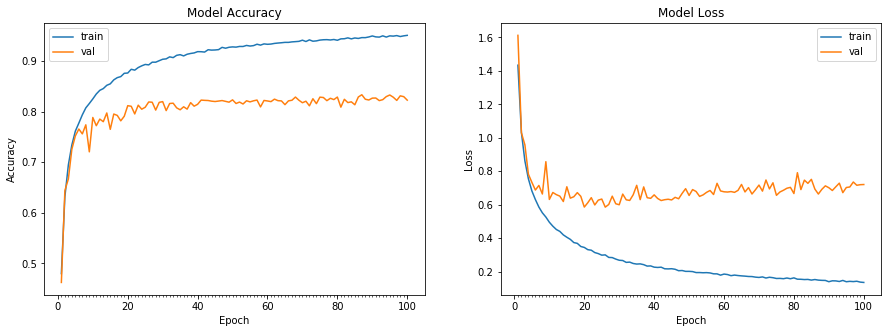

Accuracy on test data is: 82.24


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1,
                                 callbacks=[checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# BEST ACCURACY WITH CHANGED MODEL
Epoch 100/100
390/390 [==============================] - 11s 27ms/step - loss: 0.1363 - **acc: 0.9503** - val_loss: 0.7209 - val_acc: 0.8224

Epoch 00100: acc improved from **0.94983 to 0.95029**, saving model to /content/gdrive/My Drive/Assignment6A:100-acc:0.950.hdf5